In [1]:
%matplotlib notebook

import numpy as np
import math
import pylhef
import sys
import matplotlib.pyplot as plt

import mod_lhe_tools as mlt

import seaborn as sn

In [2]:
################################################################################
def lorentz_boost(pmom, rest_frame):

    p = rest_frame
    c = 1

    pmag = np.sqrt(p[1]**2 + p[2]**2 + p[3]**2)
    #E = np.sqrt((pmag*c)**2 + (m*c**2)**2)
    E = p[0]

    beta = pmag/E
    betaX = p[1]/E
    betaY = p[2]/E
    betaZ = p[3]/E

    gamma = np.sqrt(1 / (1-beta**2))

    x = ((gamma-1) * betaX) / beta**2
    y = ((gamma-1) * betaY) / beta**2
    z = ((gamma-1) * betaZ) / beta**2

    L = np.matrix([[gamma,      -gamma*betaX, -gamma*betaY, -gamma*betaZ],
                [-gamma*betaX,  1 + x*betaX,      x*betaY,      x*betaZ],
                [-gamma*betaY,      y*betaX,  1 + y*betaY,      y*betaZ],
                [-gamma*betaZ,      z*betaX,      z*betaY,  1 + z*betaZ]])


    # Moving particle that will be boosted
    #vector = np.matrix([E,p[1],p[1],p[2]])
    vector = np.matrix(pmom)

    boosted_vec = L*np.matrix.transpose(vector)

    return boosted_vec


def angle2vecs(a,b):
    
    #print(type(a[0]),type(b[0]))
    dp = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
    
    maga = np.sqrt(a[0]*a[0] + a[1]*a[1] +a[2]*a[2])
    magb = np.sqrt(b[0]*b[0] + b[1]*b[1] +b[2]*b[2])
    
    costh = dp/(maga*magb)
    #print(costh,dp)
    
    return costh

In [3]:
#lhfile1 = pylhef.read('madgraph_ttbar_tWb.lhe')
#lhfile2 = pylhef.read('madgraph_ttbar_PS_tWb.lhe')

lhfile1 = pylhef.read('madgraph_ttbar_tWb_Wmunu.lhe')
lhfile2 = pylhef.read('madgraph_ttbar_tWb_Wmunu_PS.lhe')

#lhfile2 = pylhef.read('testout.lhe')

infiles = [lhfile1, lhfile2]

Finished processing data...


<IPython.core.display.Javascript object>


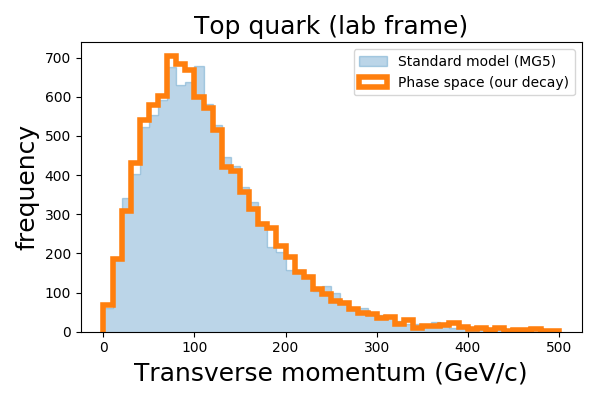

<IPython.core.display.Javascript object>


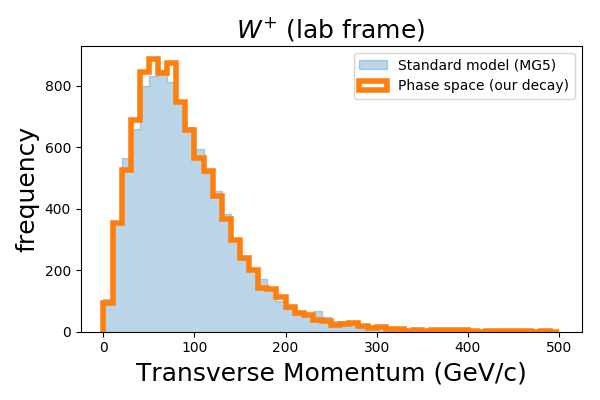

<IPython.core.display.Javascript object>


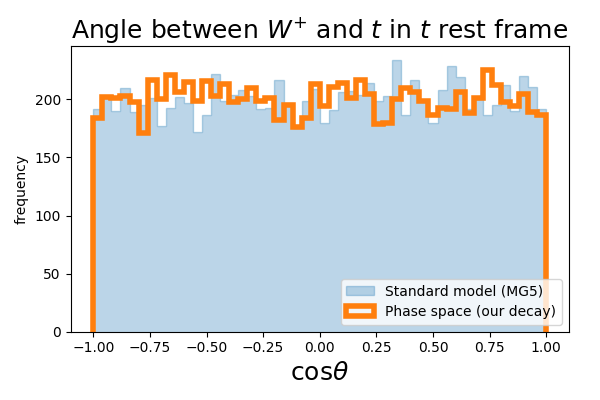

10000
10000


<IPython.core.display.Javascript object>


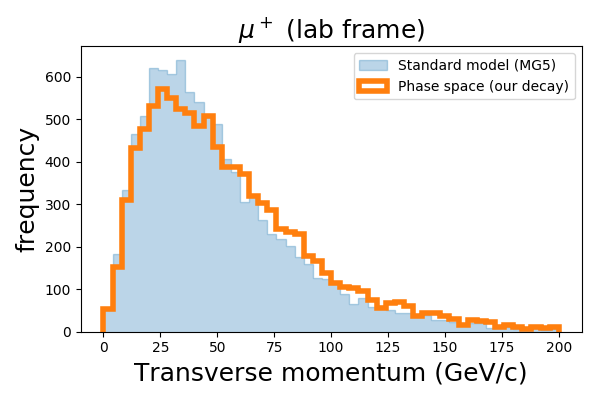

10000
10000


<IPython.core.display.Javascript object>


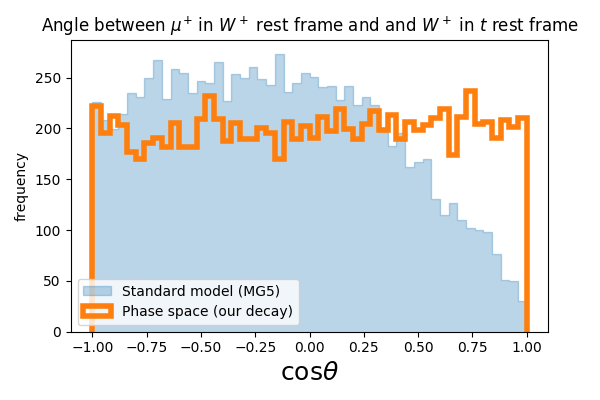

10000
10000


In [4]:
Tmom = [[],[]]    #transverse momentum of top quark
mom = [[],[]]    # momentum of top quark

WTmom = [[],[]]    #transverse momentum of W
Wmom = [[],[]]    # momentum of W

Wmom1 = [[], []]
Wtangle = [[], []]

muTmom = [[], []]
mumom = [[],[]]
muWmom = [[], []]
muWangle = [[], []]


for i,infile in enumerate(infiles):
    for j,event in enumerate(infile.events):
        
        '''
        if j%100==0:
            print(j)
        '''
        
        particles=event.particles      #finds the index of the top quark
        for particle in particles:
            if particle.id == 6:
                
                ptop = particle.p

                x = particle.p[1]
                y = particle.p[2]
                z = particle.p[3]
                
                #print(mlt.invmass(ptop[0],ptop[1],ptop[2],ptop[3]))
                
                momentum = math.sqrt(x**2+y**2)
                Tmom[i].append(momentum)
                momentum = math.sqrt(x**2+y**2+z**2)
                mom[i].append(momentum)
            elif particle.id == 24:
                
                pW = particle.p 
                
                x = particle.p[1]
                y = particle.p[2]
                z = particle.p[3]
                momentum = math.sqrt(x**2+y**2)
                WTmom[i].append(momentum)
                momentum = math.sqrt(x**2+y**2+z**2)
                Wmom[i].append(momentum)
                
                pb = particle.p
                pboost = lorentz_boost(pb,ptop)
                #pboost = lorentz_boost(ptop,ptop)
                #print(pboost)
                x = pboost.item(1,0)
                y = pboost.item(2,0)
                z = pboost.item(3,0)
                momentum = math.sqrt(x**2 + y**2+ z**2)
                #momentum = pboost.item(0,0)
                Wmom1[i].append(momentum)
                
                Wboost = [pboost.item(1,0),pboost.item(2,0),pboost.item(3,0) ]
                #print(pboost.item(0,0))
                costh = angle2vecs(ptop[1:],Wboost)
                Wtangle[i].append(costh)
            elif particle.id == -13: # Mu+
                
                x = particle.p[1]
                y = particle.p[2]
                z = particle.p[3]
                momentum = math.sqrt(x**2+y**2)
                muTmom[i].append(momentum)
                momentum = math.sqrt(x**2+y**2+z**2)
                mumom[i].append(momentum)
                
                pmu = particle.p
                pboost = lorentz_boost(pmu,pW)
                #pboost = lorentz_boost(ptop,ptop)
                #print(pboost)
                x = pboost.item(1,0)
                y = pboost.item(2,0)
                z = pboost.item(3,0)
                momentum = math.sqrt(x**2 + y**2+ z**2)
                #print(i,momentum)
                #momentum = pboost.item(0,0)
                muWmom[i].append(momentum)
                
                pboost = [pboost.item(1,0),pboost.item(2,0),pboost.item(3,0) ]
                #print(pboost.item(0,0))
                costh = angle2vecs(Wboost,pboost)
                muWangle[i].append(costh)

                
                        
print("Finished processing data...")
#bins = np.linspace(0,1200,70) 
bins = 50
hi = 600
lo = 0

labels = ['Standard model (MG5)', 'Phase space (our decay)']
fills = [True,False]
alphas = [0.3, 1.0]
lws = [1, 4]


plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
for i,T in enumerate(Tmom):
    plt.hist(T, bins,range=(0,500), alpha=alphas[i], label=labels[i],histtype='step',fill=fills[i],linewidth=lws[i])
plt.legend(loc='upper right')
plt.xlabel('Transverse momentum (GeV/c)', fontsize=18), plt.ylabel('frequency',fontsize=18)
plt.title('Top quark (lab frame)',fontsize=18)
plt.tight_layout()
plt.savefig('top_Tmom.png')



plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
for i,T in enumerate(WTmom):
    #plt.hist(T, bins,range=(lo,hi), alpha=0.5, label='top momentum',histtype='step',fill=False,linewidth=4)
    plt.hist(T, bins,range=(0,500), alpha=alphas[i], label=labels[i],histtype='step',fill=fills[i],linewidth=lws[i])

plt.legend(loc='upper right')
plt.xlabel('Transverse Momentum (GeV/c)',fontsize=18), plt.ylabel('frequency',fontsize=18)
plt.title(r'$W^{+}$ (lab frame)',fontsize=18)
plt.tight_layout()
plt.savefig('W_Tmom.png')



plt.figure(figsize=(6,4))
for i,T in enumerate(Wtangle):
    print(len(T))
    plt.hist(T, bins,range=(-1,1), alpha=alphas[i], label=labels[i],histtype='step',fill=fills[i],linewidth=lws[i])

plt.legend(loc='lower right')
plt.xlabel(r'$\cos \theta$',fontsize=18), plt.ylabel('frequency')
plt.title('Angle between $W^{+}$ and $t$ in $t$ rest frame',fontsize=18)
plt.tight_layout()
plt.savefig('Wt_angle.png')


plt.figure(figsize=(6,4))
for i,T in enumerate(muTmom):
    print(len(T))
    #plt.hist(T, bins,range=(0,300), alpha=0.5, label='top momentum',histtype='step',fill=False,linewidth=4)
    plt.hist(T, bins,range=(0,200), alpha=alphas[i], label=labels[i],histtype='step',fill=fills[i],linewidth=lws[i])
plt.legend(loc='upper right')
plt.xlabel('Transverse momentum (GeV/c)', fontsize=18), plt.ylabel('frequency',fontsize=18)
plt.title(r'$\mu^+$ (lab frame)',fontsize=18)
plt.tight_layout()
plt.savefig('mu_Tmom.png')


plt.figure(figsize=(6,4))
for i,T in enumerate(muWangle):
    print(len(T))
    #plt.hist(T, bins,range=(-1,1), alpha=0.5, label='top momentum',histtype='step',fill=False,linewidth=4)
    plt.hist(T, bins,range=(-1,1), alpha=alphas[i], label=labels[i],histtype='step',fill=fills[i],linewidth=lws[i])

plt.legend(loc='lower left')
plt.xlabel(r'$\cos \theta$',fontsize=18), plt.ylabel('frequency')
plt.title('Angle between $\mu^{+}$ in $W^+$ rest frame and and $W^+$ in $t$ rest frame',fontsize=12)
plt.tight_layout()
plt.savefig('muW_angle.png')


